<a href="https://colab.research.google.com/github/safaa400/safaasalah_46-17921_ML_assignments/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



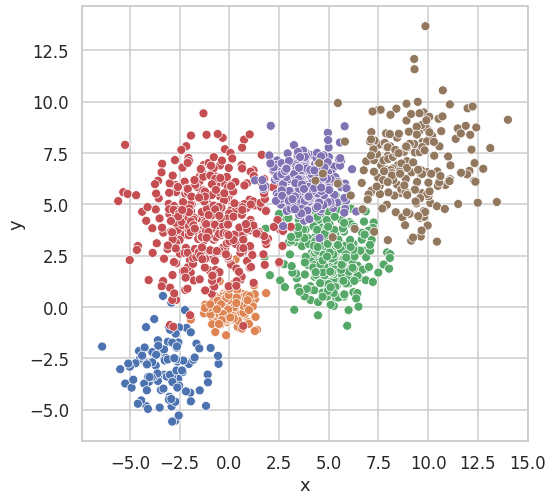

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
X_train,true_labels = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
# X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# display_cluster(X_train)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

SSE_values [36120.55102041719, 16716.61917540343, 12094.904429675615, 7812.040522678248, 5600.217515342452] 
 k_values [1, 2, 3, 4, 5]


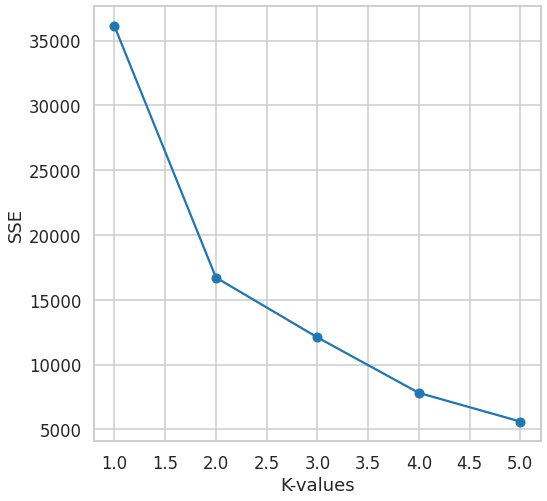

In [ ]:
# k_means_4 = KMeans(n_clusters=4, random_state=4).fit(X_train)
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
SSE_values, k_values=find_best_clusters(X_train,6)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.show()

### Using the elbow method , k=4 is the optimal number of clusters 

silhouette_scores [0.4751544541991239, 0.43631793714185435, 0.4628725400351352, 0.48085813358066154] 
 k_values [2, 3, 4, 5]


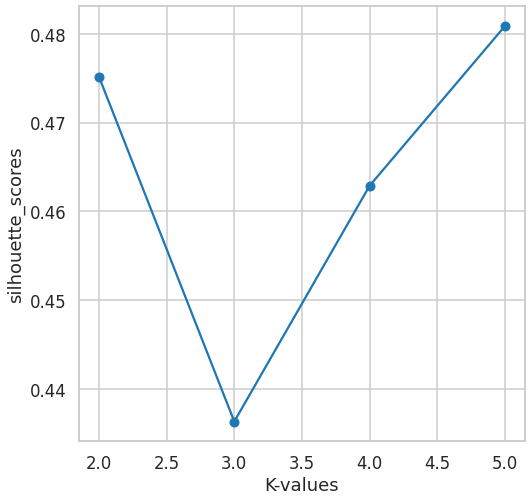

In [ ]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

Using the silhouette method , k=5 is the optimal number of clusters 

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [54]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch




## affinity

In [56]:
# AgglomerativeClustering with  euclidean affinity
agglom1 = AgglomerativeClustering(n_clusters = 4,affinity= 'euclidean')
agglom2 = AgglomerativeClustering(n_clusters = 4,affinity= 'manhattan')
agglom3 = AgglomerativeClustering(n_clusters = 4,affinity= 'cosine')


## linkage 

Text(0, 0.5, 'Euclidean distance in the space with other variables')

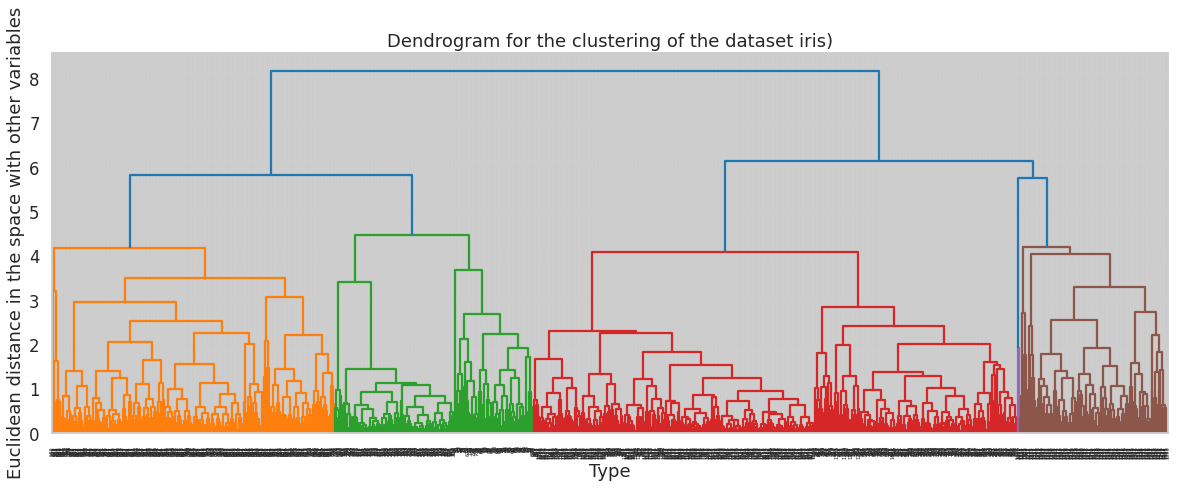

In [47]:
# Average Linkage - Average Distance between all points
Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset )')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')



In [50]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 ... 0 0 0]
{0: 825, 1: 625}


In [51]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.4716908069861964


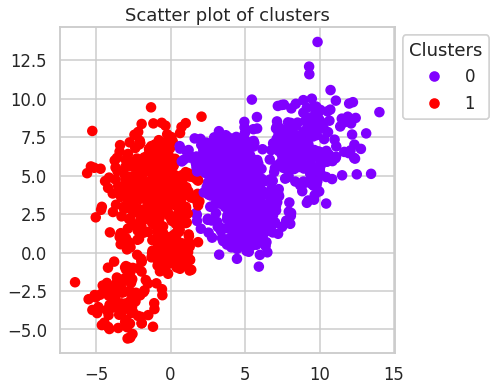

In [55]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---



Text(0, 0.5, 'Euclidean distance in the space with other variables')

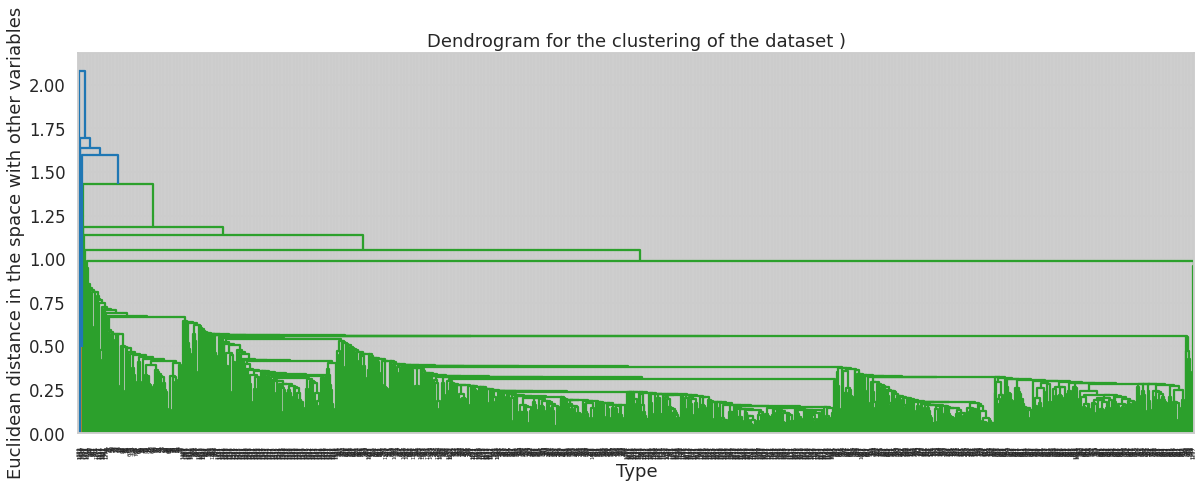

In [53]:
Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset )')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

## Distance threshold

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 